In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.23.5
1.5.3
0.12.2


In [3]:
df = pd.read_excel(r"C:\Users\lavan\Downloads\godigt_cc_data (1).xlsx")

In [4]:
#To get top 5  records
df.head( )


,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [5]:
#To get bottom 5  records
df.tail( )


,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,...,37,0,0,0,0,0,T,45244,Retired,130000


In [6]:
#userid doesnot have any relevance thus it should be dropped
df.drop(['userid'],axis=1, inplace=True)
df.head()

,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,0,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,0,...,52,0,0,0,0,0,R,280854,0,950000
2,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,0,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [7]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  8448 
no. of columns:  27


In [8]:
#Retreive the list of fields along with their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   card_no                  8448 non-null   object        
 1   card_bin_no              8448 non-null   int64         
 2   Issuer                   8448 non-null   object        
 3   card_type                8448 non-null   object        
 4   card_source_date         8448 non-null   datetime64[ns]
 5   high_networth            8448 non-null   object        
 6   active_30                8448 non-null   int64         
 7   active_60                8448 non-null   int64         
 8   active_90                8448 non-null   int64         
 9   cc_active30              8448 non-null   int64         
 10  cc_active60              8448 non-null   int64         
 11  cc_active90              8448 non-null   int64         
 12  hotlist_flag             8448 non-

There are 28 variables out of which 19 are numeric, 8 are object and 1 is date and time variable

In [9]:
# Find missing values in each column
missing_values = df.isnull().sum()

# Print missing values count
print("Missing values count:")
print(missing_values)

Missing values count:
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64


Missing values count in 'Transactor_revolver' column: 38
Total non-null values in 'Transactor_revolver' column: 8410

In [10]:
# Find the mode of 'Transactor_revolver'
transactor_revolver_mode = df['Transactor_revolver'].mode()

# Print the mode
print(transactor_revolver_mode)

0    T
Name: Transactor_revolver, dtype: object


In [11]:
# Replace missing values with 'T' in the 'Transactor_revolver' column
df['Transactor_revolver'] = df['Transactor_revolver'].fillna('T')

In [12]:
# Find missing values in each column
missing_values = df.isnull().sum()

# Print missing values count
print("Missing values count:")
print(missing_values)

Missing values count:
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64


In [13]:
1.#Unique bank customer id
card_no_counts = df['card_no'].value_counts()
print("Value counts of 'card_no':")
print(card_no_counts)

Value counts of 'card_no':
4262 41XX XXXX XXXX    2084
4258 06XX XXXX XXXX    1228
4377 48XX XXXX XXXX    1045
4386 28XX XXXX XXXX    1005
4375 51XX XXXX XXXX     854
5241 78XX XXXX XXXX     728
4384 39XX XXXX XXXX     489
4055 33XX XXXX XXXX     301
37694 5XXXX XXXXX       279
4477 47XX XXXX XXXX     273
37691 6XXXX XXXXX       162
Name: card_no, dtype: int64


In [14]:
2.#Masked credit card number
card_bin_no_counts = df['card_bin_no'].value_counts()
print("Value counts of 'card_bin_no':")
print(card_bin_no_counts)

Value counts of 'card_bin_no':
426241    2084
425806    1228
437748    1045
438628    1005
437551     854
524178     728
438439     489
405533     301
376945     279
447747     273
376916     162
Name: card_bin_no, dtype: int64


In [15]:
3.#Card network issuer
issuer_counts = df['Issuer'].value_counts()
print("Value counts of 'Issuer':")
print(issuer_counts)

Value counts of 'Issuer':
Visa          7279
Mastercard     728
Amex           441
Name: Issuer, dtype: int64


In [16]:
6.#Credit card type
card_type_counts = df['card_type'].value_counts()
print("Value counts of 'card_type':")
print(card_type_counts)

Value counts of 'card_type':
rewards       1502
prosperity    1007
edge           980
chartered      923
smartearn      765
shoprite       688
indianoil      680
cashback       676
aura           652
gold           145
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: card_type, dtype: int64


In [17]:
# 7.#Credit card sourcing date
# Convert the datetime column to datetime data type
datetime_column = 'card_source_date'  # Replace with your actual datetime column name
df[datetime_column] = pd.to_datetime(df[datetime_column])

In [18]:
# Extract the year from the datetime column
df['year'] = df[datetime_column].dt.year

# Find total count of occurrences for each year in 'card_source_date'
year_counts = df['year'].value_counts()

# Sort the counts by year in ascending order
year_counts = year_counts.sort_index()

# Display the total count for each year
print("Total count for each year in 'card_source_date':")
print(year_counts)

Total count for each year in 'card_source_date':
1998    159
1999    393
2000    392
2001    402
2002    393
2003    367
2004    407
2005    375
2006    395
2007    379
2008    420
2009    360
2010    397
2011    374
2012    379
2013    396
2014    386
2015    365
2016    388
2017    381
2018    335
2019    412
2020    193
Name: year, dtype: int64


In [19]:
#Savings/Current/Salary etc account activity in last 30 days

active_30_counts = df['active_30'].value_counts()
print("Value counts of 'active_30':")
print(active_30_counts)

Value counts of 'active_30':
0    5978
1    2470
Name: active_30, dtype: int64


In [20]:
#Savings/Current/Salary etc account activity in last 60 day
active_60_counts = df['active_60'].value_counts()
print("Value counts of 'active_60':")
print(active_60_counts)

Value counts of 'active_60':
0    4268
1    4180
Name: active_60, dtype: int64


In [21]:
#Savings/Current/Salary etc account activity in last 90 day
active_90_counts = df['active_90'].value_counts()
print("Value counts of 'active_90':")
print(active_90_counts)

Value counts of 'active_90':
1    5424
0    3024
Name: active_90, dtype: int64


In [22]:
#CC activity in last 60 day
cc_active60_counts = df['cc_active60'].value_counts()
print("Value counts of 'cc_active60':")
print(cc_active60_counts)

Value counts of 'cc_active60':
0    4355
1    4093
Name: cc_active60, dtype: int64


In [23]:
#CC activity in last 90 days
cc_active90_counts = df['cc_active90'].value_counts()
print("Value counts of 'cc_active90':")
print(cc_active90_counts)

Value counts of 'cc_active90':
1    5342
0    3106
Name: cc_active90, dtype: int64


In [24]:
#Whether card is hotlisted
hotlist_flag_counts = df['hotlist_flag'].value_counts()
print("Value counts of 'hotlist_flag':")
print(hotlist_flag_counts)

Value counts of 'hotlist_flag':
N    8410
Y      38
Name: hotlist_flag, dtype: int64


In [55]:
engagement_products=df['engagement_products'].value_counts()
print("Value counts of 'engagement_products':")
print(engagement_products)

Value counts of 'engagement_products':
4    1010
3     966
1     950
8     949
5     940
0     939
6     926
7     889
2     879
Name: engagement_products, dtype: int64


In [26]:
#Number of convenient product customer holds (dc, cc, netbanking active, mobile banking active, wallet active etc)
widget_products_counts = df['widget_products'].value_counts()
print("Value counts of 'widget_products':")
print(widget_products_counts)

Value counts of 'widget_products':
7    1132
4    1117
5    1115
6    1062
3    1060
2    1010
1     997
0     955
Name: widget_products, dtype: int64


In [27]:
# Count occurrences of each unique value in the 'engagement_products' column
engagement_products_counts = df['engagement_products'].value_counts()

# Display the count results
print("Value counts of 'engagement_products':")
print(engagement_products_counts)

Value counts of 'engagement_products':
4    1010
3     966
1     950
8     949
5     940
0     939
6     926
7     889
2     879
Name: engagement_products, dtype: int64


In [57]:
other_bank_cc_holding_counts = df['other_bank_cc_holding'].value_counts()
print("Value counts of 'other_bank_cc_holding':")
print(other_bank_cc_holding_counts)

Value counts of 'other_bank_cc_holding':
Y    4728
N    3720
Name: other_bank_cc_holding, dtype: int64


In [28]:
#Annual income recoreded in credit card application
annual_income_counts = df['annual_income_at_source'].value_counts()
print("Value counts of 'annual_income_at_source':")
print(annual_income_counts)

Value counts of 'annual_income_at_source':
1206050    2
1470369    2
1413978    2
1377713    2
1301211    2
          ..
323506     1
1449399    1
1200604    1
1304227    1
1329756    1
Name: annual_income_at_source, Length: 8435, dtype: int64


In [29]:
#Hold other bank credit card
other_bank_cc_counts = df['other_bank_cc_holding'].value_counts()
print("Value counts of 'other_bank_cc_holding':")
print(other_bank_cc_counts)

Value counts of 'other_bank_cc_holding':
Y    4728
N    3720
Name: other_bank_cc_holding, dtype: int64


In [30]:
#Vintage with the bank (in months) as on Tth month
bank_vintage_counts = df['bank_vintage'].value_counts()
print("Value counts of 'bank_vintage':")
print(bank_vintage_counts)

Value counts of 'bank_vintage':
57    173
37    170
36    170
56    168
40    166
32    165
46    165
14    164
26    164
21    163
28    162
39    162
60    161
47    161
9     161
49    161
53    161
17    159
41    158
27    157
59    157
35    157
33    156
11    155
34    155
51    155
7     154
19    154
52    154
12    154
43    154
44    153
8     152
38    152
48    151
45    151
31    151
58    151
6     150
18    150
10    150
13    149
23    149
25    145
55    144
22    144
24    142
29    142
42    139
30    138
15    138
50    137
16    136
20    134
54    124
Name: bank_vintage, dtype: int64


In [31]:
#Customer spends next (T) month using credit card
activity_counts = df['T+1_month_activity'].value_counts()
print("Value counts of 'T+1_month_activity':")
print(activity_counts)

Value counts of 'T+1_month_activity':
0    7508
1     940
Name: T+1_month_activity, dtype: int64


In [32]:
#Customer spends in T+2 month using credit card
activity_counts = df['T+2_month_activity'].value_counts()
print("Value counts of 'T+2_month_activity':")
print(activity_counts)

Value counts of 'T+2_month_activity':
0    8043
1     405
Name: T+2_month_activity, dtype: int64


In [33]:
#Customer spends next month using credit card
activity_counts = df['T+3_month_activity'].value_counts()
print("Value counts of 'T+3_month_activity':")
print(activity_counts)

Value counts of 'T+3_month_activity':
0    7769
1     679
Name: T+3_month_activity, dtype: int64


In [34]:
#Customer spends next month using credit card
activity_counts = df['T+6_month_activity'].value_counts()
print("Value counts of 'T+6_month_activity':")
print(activity_counts)

Value counts of 'T+6_month_activity':
0    8373
1      75
Name: T+6_month_activity, dtype: int64


In [35]:
#Customer spends next month using credit card
activity_counts = df['T+12_month_activity'].value_counts()
print("Value counts of 'T+12_month_activity':")
print(activity_counts)

Value counts of 'T+12_month_activity':
0    8368
1      80
Name: T+12_month_activity, dtype: int64


In [36]:
#Revolver: Customer who carries balances over from one month to the next. Transactor: Customer who pays off their balances in full every month.

revolver_counts = df['Transactor_revolver'].value_counts()
print("Value counts of 'Transactor_revolver':")
print(revolver_counts)

Value counts of 'Transactor_revolver':
T    7153
R    1295
Name: Transactor_revolver, dtype: int64


In [37]:
#Average credit card spends in last 3 months
spends_counts = df['avg_spends_l3m'].value_counts()
print("Value counts of 'avg_spends_l3m':")
print(spends_counts)

Value counts of 'avg_spends_l3m':
0        38
39798     3
2617      3
64953     3
4234      3
         ..
3845      1
26864     1
11975     1
69983     1
45244     1
Name: avg_spends_l3m, Length: 8095, dtype: int64


In [38]:
#Occupation recorded at the time of credit card application

occupation_counts = df['Occupation_at_source'].value_counts()
print("Value counts of 'Occupation_at_source':")
print(occupation_counts)

Value counts of 'Occupation_at_source':
Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
0                 261
Name: Occupation_at_source, dtype: int64


In [39]:
mode_value = df['Occupation_at_source'][df['Occupation_at_source'] != 0].mode()[0]
print("Mode of 'Occupation_at_source' (excluding 0):")
print(mode_value)

Mode of 'Occupation_at_source' (excluding 0):
Salaried


In [40]:
df['Occupation_at_source'].replace(0, 'Salaried', inplace=True)
occupation_counts = df['Occupation_at_source'].value_counts()
print("Value counts of 'Occupation_at_source':")
print(occupation_counts)

Value counts of 'Occupation_at_source':
Salaried         4179
Self Employed    2175
Retired          1089
Student           621
Housewife         384
Name: Occupation_at_source, dtype: int64


In [41]:
#Current credit card limit
cc_limit_counts = df['cc_limit'].value_counts()
print("Value counts of 'cc_limit':")
print(cc_limit_counts)

Value counts of 'cc_limit':
90000     458
80000     427
150000    406
130000    373
140000    372
         ... 
990000     14
730000     13
500000     12
780000     12
0           1
Name: cc_limit, Length: 99, dtype: int64


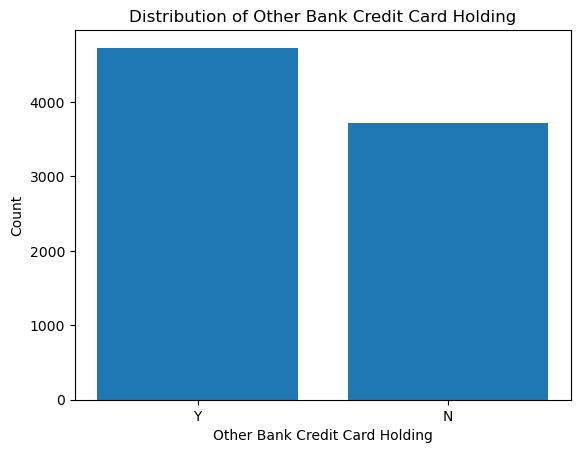

In [56]:
# Calculate the value counts of 'other_bank_cc_holding'
other_bank_cc_counts = df['other_bank_cc_holding'].value_counts()

# Create a bar plot
plt.bar(other_bank_cc_counts.index, other_bank_cc_counts.values)

# Set the labels and title
plt.xlabel('Other Bank Credit Card Holding')
plt.ylabel('Count')
plt.title('Distribution of Other Bank Credit Card Holding')

# Display the plot
plt.show()

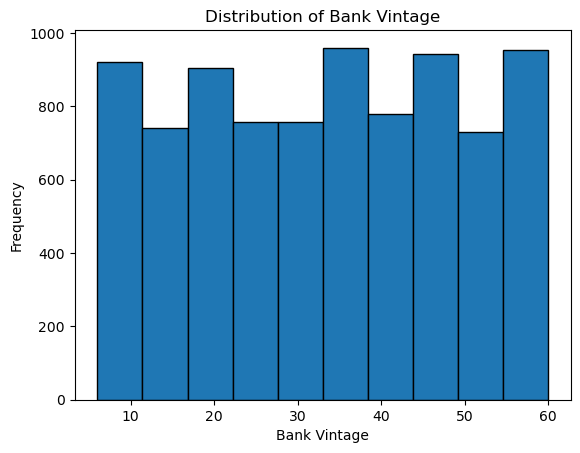

In [59]:
# Create a histogram
plt.hist(df['bank_vintage'], bins=10, edgecolor='black')

# Set the labels and title
plt.xlabel('Bank Vintage')
plt.ylabel('Frequency')
plt.title('Distribution of Bank Vintage')

# Display the plot
plt.show()

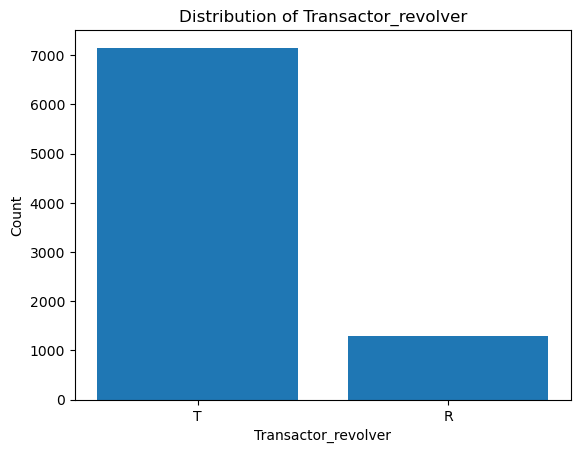

In [61]:
# Calculate the value counts of 'Transactor_revolver'
transactor_revolver_counts = df['Transactor_revolver'].value_counts()

# Create a bar plot
plt.bar(transactor_revolver_counts.index, transactor_revolver_counts.values)

# Set the labels and title
plt.xlabel('Transactor_revolver')
plt.ylabel('Count')
plt.title('Distribution of Transactor_revolver')

# Display the plot
plt.show()




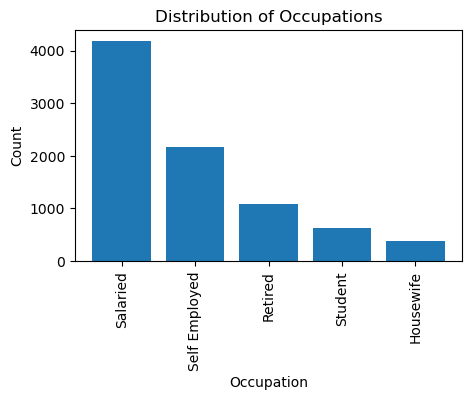

In [64]:
# Calculate the value counts of 'Occupation_at_source'
occupation_counts = df['Occupation_at_source'].value_counts()

# Create a figure with reduced size
plt.figure(figsize=(5, 3))

# Create a bar plot
plt.bar(occupation_counts.index, occupation_counts.values)

# Set the labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupations')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Display the plot
plt.show()







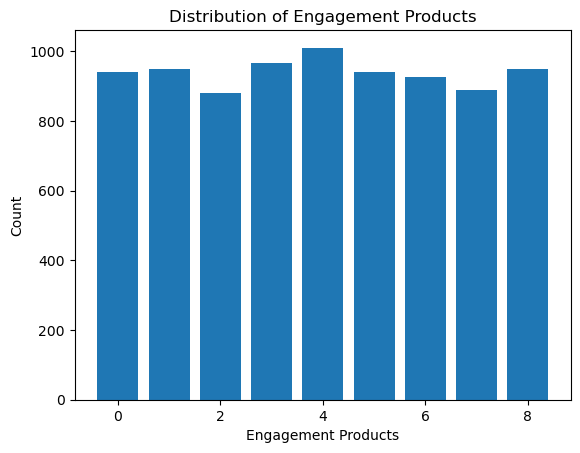

In [65]:
# Calculate the value counts of 'engagement_products'
engagement_products_counts = df['engagement_products'].value_counts()

# Create a bar plot
plt.bar(engagement_products_counts.index, engagement_products_counts.values)

# Set the labels and title
plt.xlabel('Engagement Products')
plt.ylabel('Count')
plt.title('Distribution of Engagement Products')

# Display the plot
plt.show()